In [23]:
import planetspy as ps
import planetspy.engines as eng
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

class record:
    loc = []
    def __init__(self, bodies):
        self.loc.append(np.copy(bodies[0][::,0:3]))
    def run(self, simclass):
        self.loc.append(np.copy(simclass.bodies[0][::,0:3]))
        return False

bodies = [
    np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.371*10**6, 5.972*10**24],
              [0, 6.371*10**6 + 400*10**3, 0, -10.8*10**3, 0, 0, 100*10**3, 0],
              [6.371*10**6 + 385*10**6, 0, 0, 0, 10**3, 0, 1737.5*10**3, 7.34*10**22]
             ])
    , [["Earth"], ["ISS"]]
]

recinst = record(bodies)
sim = ps.Simulate(eng.PP, 1, 10, bodies, bailout = 60*60*24*31, envmod=[recinst])
sim.main_loop()
sim.steps

267840.0

<IPython.core.display.Javascript object>


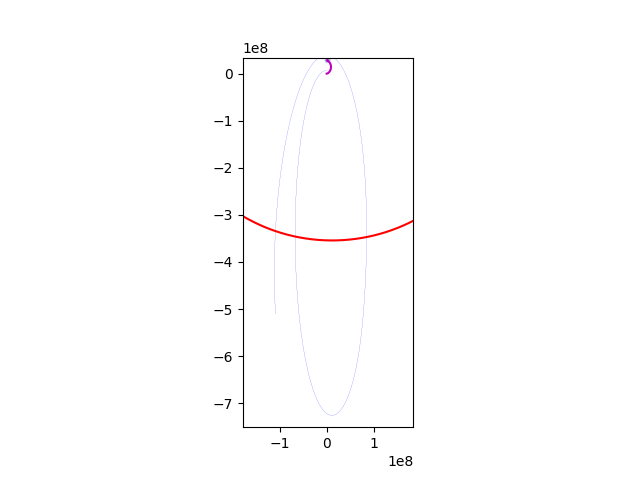

In [24]:
%matplotlib notebook
plt.plot([i[0][0] for i in recinst.loc], [i[0][1] for i in recinst.loc], "m-")
plt.plot([i[1][0] for i in recinst.loc], [i[1][1] for i in recinst.loc], "b-", linewidth=.1)
plt.plot([i[2][0] for i in recinst.loc], [i[2][1] for i in recinst.loc], "r-")

patches = [Circle(bodies[0][i][:2], bodies[0][i,6]) for i in range(3)]
#plt.xlim(0, 6.371*10**6 + 400*10**3)
#plt.ylim(0, 6.371*10**6 + 400*10**3)
plt.axes().set_aspect("equal")
#patches
plt.axes().add_collection(PatchCollection(patches, alpha=0.4))

[array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          6.37100000e+06,  5.97200000e+24],
        [-1.80789895e+07,  1.03515295e+07,  1.07828432e+05,
         -3.04729103e+03, -1.85092939e+03, -1.92805145e+01,
          1.00000000e+05,  0.00000000e+00]]), [['Earth'], ['ISS']]]